# Model Selection

### Import Data

In [1]:
import pandas as pd
import numpy as np
from dataengineering.loaddata_fromdb import *

In [2]:
melb_house_prices = get_df('melb_data')
melb_house_prices.tail()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,None,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,None,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,None,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,None,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,None,-37.81188,144.88449,Western Metropolitan,6543.0


### Preprocessing

#### Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split

#Add 'datetime' feature to data
melb_house_prices['sold_date'] = pd.to_datetime(melb_house_prices['date'], format='%d/%m/%Y')
melb_house_prices.drop('date', axis=1, inplace=True)
melb_house_prices.head()

,suburb,address,rooms,type,price,method,sellerg,distance,postcode,bedroom2,...,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount,sold_date
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2016-12-03
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2016-02-04
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2017-03-04
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,...,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2017-03-04
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2016-06-04


In [4]:
#Sort data so that we can have latest data in test split and rest in train
melb_prices_sorted = melb_house_prices.sort_values('sold_date').reset_index(drop=True)
display(melb_prices_sorted.head())
display(melb_prices_sorted.tail())

,suburb,address,rooms,type,price,method,sellerg,distance,postcode,bedroom2,...,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount,sold_date
0,Surrey Hills,999A Riversdale Rd,3,h,1205000.0,S,Fletchers,11.2,3127.0,3.0,...,2.0,490.0,NaN,NaN,Whitehorse,-37.8361,145.1006,Southern Metropolitan,5457.0,2016-01-28
1,Surrey Hills,1/10 Florence Rd,2,u,813000.0,S,Fletchers,11.2,3127.0,2.0,...,2.0,108.0,NaN,NaN,Whitehorse,-37.8276,145.1023,Southern Metropolitan,5457.0,2016-01-28
2,Mont Albert,50/781 Whitehorse Rd,2,u,750000.0,S,RW,11.8,3127.0,2.0,...,2.0,0.0,80.0,2003.0,Whitehorse,-37.8161,145.1098,Eastern Metropolitan,2079.0,2016-02-04
3,Ormond,7/30 Walsh St,1,u,250000.0,VB,Ray,11.8,3204.0,1.0,...,1.0,0.0,36.0,1960.0,Glen Eira,-37.9028,145.0475,Southern Metropolitan,3578.0,2016-02-04
4,Port Melbourne,404/101 Bay St,2,u,550000.0,S,Buxton,3.8,3207.0,2.0,...,1.0,0.0,57.0,2012.0,Port Phillip,-37.8408,144.9400,Southern Metropolitan,8648.0,2016-02-04


,suburb,address,rooms,type,price,method,sellerg,distance,postcode,bedroom2,...,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount,sold_date
13575,Murrumbeena,21 Reid St,3,h,1321188.0,SP,Woodards,10.1,3163.0,3.0,...,1.0,586.0,200.0,1945.0,None,-37.90584,145.07250,Southern Metropolitan,4442.0,2017-09-23
13576,Mulgrave,25 Rupert Dr,3,h,840000.0,S,Ray,18.8,3170.0,3.0,...,2.0,656.0,107.0,1972.0,None,-37.93271,145.17792,South-Eastern Metropolitan,7113.0,2017-09-23
13577,Mulgrave,5 Lola St,5,h,880000.0,PI,SN,18.8,3170.0,5.0,...,2.0,654.0,NaN,1960.0,None,-37.92914,145.17372,South-Eastern Metropolitan,7113.0,2017-09-23
13578,Mulgrave,12 Brookland Ct,4,h,1080000.0,S,Ray,18.8,3170.0,4.0,...,2.0,914.0,204.0,1980.0,None,-37.93173,145.19475,South-Eastern Metropolitan,7113.0,2017-09-23
13579,Brighton East,86 Glencairn Av,5,h,2750000.0,S,Buxton,10.3,3187.0,5.0,...,3.0,626.0,NaN,NaN,None,-37.92427,145.02003,Southern Metropolitan,6938.0,2017-09-23


In [5]:
#Split data withe the latest 20% in test
train_df, test_df = train_test_split(melb_prices_sorted, test_size=0.2, shuffle=False)

X_train = train_df.drop("price", axis=1)
y_train = train_df["price"]
X_test = test_df.drop("price", axis=1)
y_test = test_df["price"]

We will now work with the train data alone and use the test for measuring the performance at the end.

#### Remove Outliers

In [6]:
#Features in X
X_train.columns

Index(['suburb', 'address', 'rooms', 'type', 'method', 'sellerg', 'distance',
       'postcode', 'bedroom2', 'bathroom', 'car', 'landsize', 'buildingarea',
       'yearbuilt', 'councilarea', 'lattitude', 'longtitude', 'regionname',
       'propertycount', 'sold_date'],
      dtype='object')

Remove some of the features as discussed in EDA

In [7]:
cols_toremove = ['suburb', 'address', 'method', 'bedroom2', 'buildingarea', 'councilarea']
X_train.drop(cols_toremove, axis=1, inplace=True)
X_train.columns

Index(['rooms', 'type', 'sellerg', 'distance', 'postcode', 'bathroom', 'car',
       'landsize', 'yearbuilt', 'lattitude', 'longtitude', 'regionname',
       'propertycount', 'sold_date'],
      dtype='object')

Remove data for houses built before 1800

In [8]:
indices_yearbefore1800 = X_train[X_train['yearbuilt']<1800].index

X_train = X_train.drop(indices_yearbefore1800)
y_train = y_train.drop(indices_yearbefore1800)

#### Feature Engineering

##### Feature Trasnformation

Normalize landsize with natural log

In [9]:
# Add column with log of landsize
X_train['landsize_log']=pd.Series(np.log(X_train['landsize']+1))
X_train.drop('landsize', axis=1, inplace=True)

Replace sold_date with year_sold, month_sold and day_sold

In [10]:
X_train['year_sold']=X_train['sold_date'].dt.year
X_train['month_sold']=X_train['sold_date'].dt.month
X_train['day_sold']=X_train['sold_date'].dt.day
sold_date = X_train['sold_date']
X_train.drop('sold_date', axis=1, inplace=True)

Portion of landsize with bathroom occupied with respect to the number of prperties in the suburb

In [11]:
X_train['landbtroom_per_propcount'] = X_train['landsize_log']*X_train['bathroom']*1000/X_train['propertycount']

In [12]:
X_train.head(3)

,rooms,type,sellerg,distance,postcode,bathroom,car,yearbuilt,lattitude,longtitude,regionname,propertycount,landsize_log,year_sold,month_sold,day_sold,landbtroom_per_propcount
0,3,h,Fletchers,11.2,3127.0,1.0,2.0,NaN,-37.8361,145.1006,Southern Metropolitan,5457.0,6.196444,2016,1,28,1.135504
1,2,u,Fletchers,11.2,3127.0,1.0,2.0,NaN,-37.8276,145.1023,Southern Metropolitan,5457.0,4.691348,2016,1,28,0.859694
2,2,u,RW,11.8,3127.0,2.0,2.0,2003.0,-37.8161,145.1098,Eastern Metropolitan,2079.0,0.000000,2016,2,4,0.000000


##### Data Imputation

In [13]:
# Percentage of missing data for each feature in Train Data
X_train.isnull().mean()*100

rooms                        0.000000
type                         0.000000
sellerg                      0.000000
distance                     0.000000
postcode                     0.000000
bathroom                     0.000000
car                          0.000000
yearbuilt                   38.663353
lattitude                    0.000000
longtitude                   0.000000
regionname                   0.000000
propertycount                0.000000
landsize_log                 0.000000
year_sold                    0.000000
month_sold                   0.000000
day_sold                     0.000000
landbtroom_per_propcount     0.000000
dtype: float64

We know the car data has missing values from EDA. It seems it has all been captured in the test set.

Impute null values in Car Parking spots feature with "zero"

In [14]:
X_train['car']=X_train['car'].fillna(0)

Missing Yearbuilt

In [15]:
# For missing values in year built we can fill with the mean value in train set and add an additional feature showing whether it was missing
X_train['yearbuilt_missing'] = X_train['yearbuilt'].isnull().astype(int)
mean_yearbuilt = X_train['yearbuilt'].mean()
X_train['yearbuilt']=X_train['yearbuilt'].fillna(mean_yearbuilt)
X_train['yearbuilt']=X_train['yearbuilt'].astype(int)
print("Mean year used to fill missing data : {}".format(int(mean_yearbuilt)))

Mean year used to fill missing data : 1963


#### One-Hot Encode Categorica features

In [16]:
# If a Seller has sold less than 75 houses mark him as "other"
min_sale = 100
X_train['sellerg'] = X_train['sellerg'].apply(lambda x : x.lower() if 
                                              (X_train['sellerg'].value_counts()[x]>min_sale)
                                              else 
                                              "other")
X_train['sellerg'].value_counts()

other            2085
nelson           1335
jellis           1090
hockingstuart     954
barry             779
marshall          540
buxton            507
ray               479
biggin            343
brad              300
woodards          258
fletchers         221
greg              205
jas               195
sweeney           182
miles             179
mcgrath           169
rt                166
noel              155
gary              154
hodges            130
village           115
harcourts         114
kay               106
stockdale         102
Name: sellerg, dtype: int64

In [17]:
# Replace spaces and hyphens in Region Name with Underscore and convert all to lowercase
X_train['regionname'] = X_train['regionname'].str.replace(' ', '_').str.replace('-','_').str.lower()

One-Hot Encode

In [18]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
OneHotCols =['type', 'regionname','sellerg']
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[OneHotCols]))


In [19]:
OH_cols_train.index = X_train.index
OH_cols_train

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10861,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10862,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
OH_X_train = X_train.drop(OneHotCols, axis=1)
OH_X_train = pd.concat([OH_X_train, OH_cols_train], axis=1)

In [21]:
OH_X_train.head(3)

,rooms,distance,postcode,bathroom,car,yearbuilt,lattitude,longtitude,propertycount,landsize_log,...,23,24,25,26,27,28,29,30,31,32
0,3,11.2,3127.0,1.0,2.0,1963,-37.8361,145.1006,5457.0,6.196444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,11.2,3127.0,1.0,2.0,1963,-37.8276,145.1023,5457.0,4.691348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,11.8,3127.0,2.0,2.0,2003,-37.8161,145.1098,2079.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
OH_X_train.columns

Index([                   'rooms',                 'distance',
                       'postcode',                 'bathroom',
                            'car',                'yearbuilt',
                      'lattitude',               'longtitude',
                  'propertycount',             'landsize_log',
                      'year_sold',               'month_sold',
                       'day_sold', 'landbtroom_per_propcount',
              'yearbuilt_missing',                          0,
                                1,                          2,
                                3,                          4,
                                5,                          6,
                                7,                          8,
                                9,                         10,
                               11,                         12,
                               13,                         14,
                               15,                     

#### Apply feature engineering done above to test set

In [23]:
#Remove some of the features as discussed in EDA
cols_toremove = ['suburb', 'address', 'method', 'bedroom2', 'buildingarea', 'councilarea']
X_test.drop(cols_toremove, axis=1, inplace=True)

# Add column with log of landsize
X_test['landsize_log']=pd.Series(np.log(X_test['landsize']+1))
X_test.drop('landsize', axis=1, inplace=True)

# Replace sold_date with year_sold, month_sold and day_sold
X_test['year_sold']=X_test['sold_date'].dt.year
X_test['month_sold']=X_test['sold_date'].dt.month
X_test['day_sold']=X_test['sold_date'].dt.day
sold_date_test = X_test['sold_date']
X_test.drop('sold_date', axis=1, inplace=True)

#Portion of landsize with bathroom occupied with respect to the number of prperties in the suburb
X_test['landbtroom_per_propcount'] = X_test['landsize_log']*X_test['bathroom']*1000/X_test['propertycount']

# Fill missing car spot values
X_test['car']=X_test['car'].fillna(0)

In [24]:
# Missing 'tyearbuilt'
X_test['yearbuilt_missing'] = X_test['yearbuilt'].isnull().astype(int)
X_test['yearbuilt']=X_test['yearbuilt'].fillna(mean_yearbuilt)
X_test['yearbuilt']=X_test['yearbuilt'].astype(int)

In [25]:
# Set names of sellers with less than 100 sales in Train set to "Others"
X_test['sellerg']=X_test['sellerg'].apply(lambda x : x if x in X_train['sellerg'].unique() else 'others')

In [26]:
# Replace spaces and hyphens in Region Name with Underscore and convert all to lowercase
X_test['regionname'] = X_test['regionname'].str.replace(' ', '_').str.replace('-','_').str.lower()

In [27]:
# One Hot encoding
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[OneHotCols]))
OH_cols_test.index = X_test.index
OH_X_test = pd.concat([X_test, OH_cols_test], axis=1)
OH_X_test = OH_X_test.drop(OneHotCols, axis=1)

/Users/georgethomas/Documents/ML/APR_2023/PROJECTS/HOUSE-PRICE-PREDICTOR/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Model Selection

In [28]:
print(OH_X_test.shape, y_test.shape)
print(OH_X_train.shape, y_train.shape)

(2716, 48) (2716,)
(10863, 48) (10863,)


In [29]:
# Convert Numerical column names from One Hot Encoding to string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_test.columns = OH_X_test.columns.astype(str)

#### Model Evaluation

In [30]:
# Function to check scores
from sklearn.metrics import mean_absolute_error, r2_score

def mae_score_check(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return np.round(mean_absolute_error(y_test, preds), 2)

def r2_score_check(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return np.round(r2_score(y_test, preds), decimals=5)

#### Baseline Models

In [31]:
# Base Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(random_state=1)
model_rf = RandomForestRegressor(random_state=1, n_estimators=150, max_features=21)
test_score_track = {}

In [32]:
test_score_track['OH_X_train_mae']=[mae_score_check(OH_X_train, OH_X_test, y_train, y_test, model_lr),
                                mae_score_check(OH_X_train, OH_X_test, y_train, y_test, model_dt),
                                mae_score_check(OH_X_train, OH_X_test, y_train, y_test, model_rf)]
test_score_track['OH_X_train_r2']=[r2_score_check(OH_X_train, OH_X_test, y_train, y_test, model_lr),
                                r2_score_check(OH_X_train, OH_X_test, y_train, y_test, model_dt),
                                r2_score_check(OH_X_train, OH_X_test, y_train, y_test, model_rf)]


print("Linear Regression : MAE_score= {} , R2_score= {}".format(
    test_score_track['OH_X_train_mae'][0], 
    test_score_track['OH_X_train_r2'][0]))

print("Decision Tree Regressor : MAE_score= {} , R2_score= {}".format(
    test_score_track['OH_X_train_mae'][1], 
    test_score_track['OH_X_train_r2'][1]))

print("Random Forest Regressor : MAE_score= {} , R2_score= {}".format(
    test_score_track['OH_X_train_mae'][2], 
    test_score_track['OH_X_train_r2'][2]))

Linear Regression : MAE_score= 276815.42 , R2_score= 0.54694
Decision Tree Regressor : MAE_score= 241621.33 , R2_score= 0.49628
Random Forest Regressor : MAE_score= 158552.71 , R2_score= 0.76314


In [33]:
test_score_track

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314]}

Base cross-validation Score

In [34]:
# Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, random_state=0, test_size=0.2)
cv_score_track={}
cv_score_track['OH_X_train']=[round(cross_val_score(model_lr, OH_X_train, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, OH_X_train, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, OH_X_train, y_train, cv=cv).mean(), 2)]

print("CV Score on Train set with Linear Regresion: {}".format(cv_score_track["OH_X_train"][0]))
print("CV Score on Train set with Decision Tree Regressor: {}".format(cv_score_track["OH_X_train"][1]))
print("CV Score on Train set with Random Forest Regressor: {}".format(cv_score_track["OH_X_train"][2]))

CV Score on Train set with Linear Regresion: 0.64
CV Score on Train set with Decision Tree Regressor: 0.58
CV Score on Train set with Random Forest Regressor: 0.8


#### Model Tuning

##### Grid Search CV with Linear Regression

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [-1]
}
scoring = 'neg_mean_absolute_error'
cv=5
grid_search = GridSearchCV(model_lr, param_grid, scoring=scoring, cv=cv)

grid_search.fit(OH_X_train, y_train)

print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(np.sqrt(-grid_search.best_score_)))

Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Best score: 512.08


In [36]:
model_lr=LinearRegression(fit_intercept= True, n_jobs= -1, positive= False, copy_X= True)

In [37]:
print("Linear Regression : MAE_score= {} , R2_score= {}".format(
    mae_score_check(OH_X_train, OH_X_test, y_train, y_test, model_lr), 
    r2_score_check(OH_X_train, OH_X_test, y_train, y_test, model_lr)))

Linear Regression : MAE_score= 276815.42 , R2_score= 0.54694


Linear Regression was already set to best parameters by default. But the performance is less than that of Random Forest Regressor. So, we shall tune that instead.

### Feature Reduction
We can check whether removing some of the features will lead to a better performance. For studying the features we cn give the One-Hot encoded features their actual names.

In [38]:
# Create dictionary with names to be replaced.
OHd_col_names = OH_encoder.get_feature_names_out(OneHotCols)

start_idx = len(OH_X_train.columns) - len(OHd_col_names)
rename_dict = {OH_X_train.columns[i]: 
               OH_X_train.columns[i] if i<start_idx
               else OHd_col_names[i-start_idx]
               for i in range(len(OH_X_train.columns))}

In [39]:
# Rename features using dictionary
OH_X_train = OH_X_train.rename(columns=rename_dict)
OH_X_test = OH_X_test.rename(columns=rename_dict)

In [40]:
OH_X_train.head()

,rooms,distance,postcode,bathroom,car,yearbuilt,lattitude,longtitude,propertycount,landsize_log,...,sellerg_miles,sellerg_nelson,sellerg_noel,sellerg_other,sellerg_ray,sellerg_rt,sellerg_stockdale,sellerg_sweeney,sellerg_village,sellerg_woodards
0,3,11.2,3127.0,1.0,2.0,1963,-37.8361,145.1006,5457.0,6.196444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,11.2,3127.0,1.0,2.0,1963,-37.8276,145.1023,5457.0,4.691348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,11.8,3127.0,2.0,2.0,2003,-37.8161,145.1098,2079.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,11.8,3204.0,1.0,1.0,1960,-37.9028,145.0475,3578.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,3.8,3207.0,1.0,1.0,2012,-37.8408,144.9400,8648.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

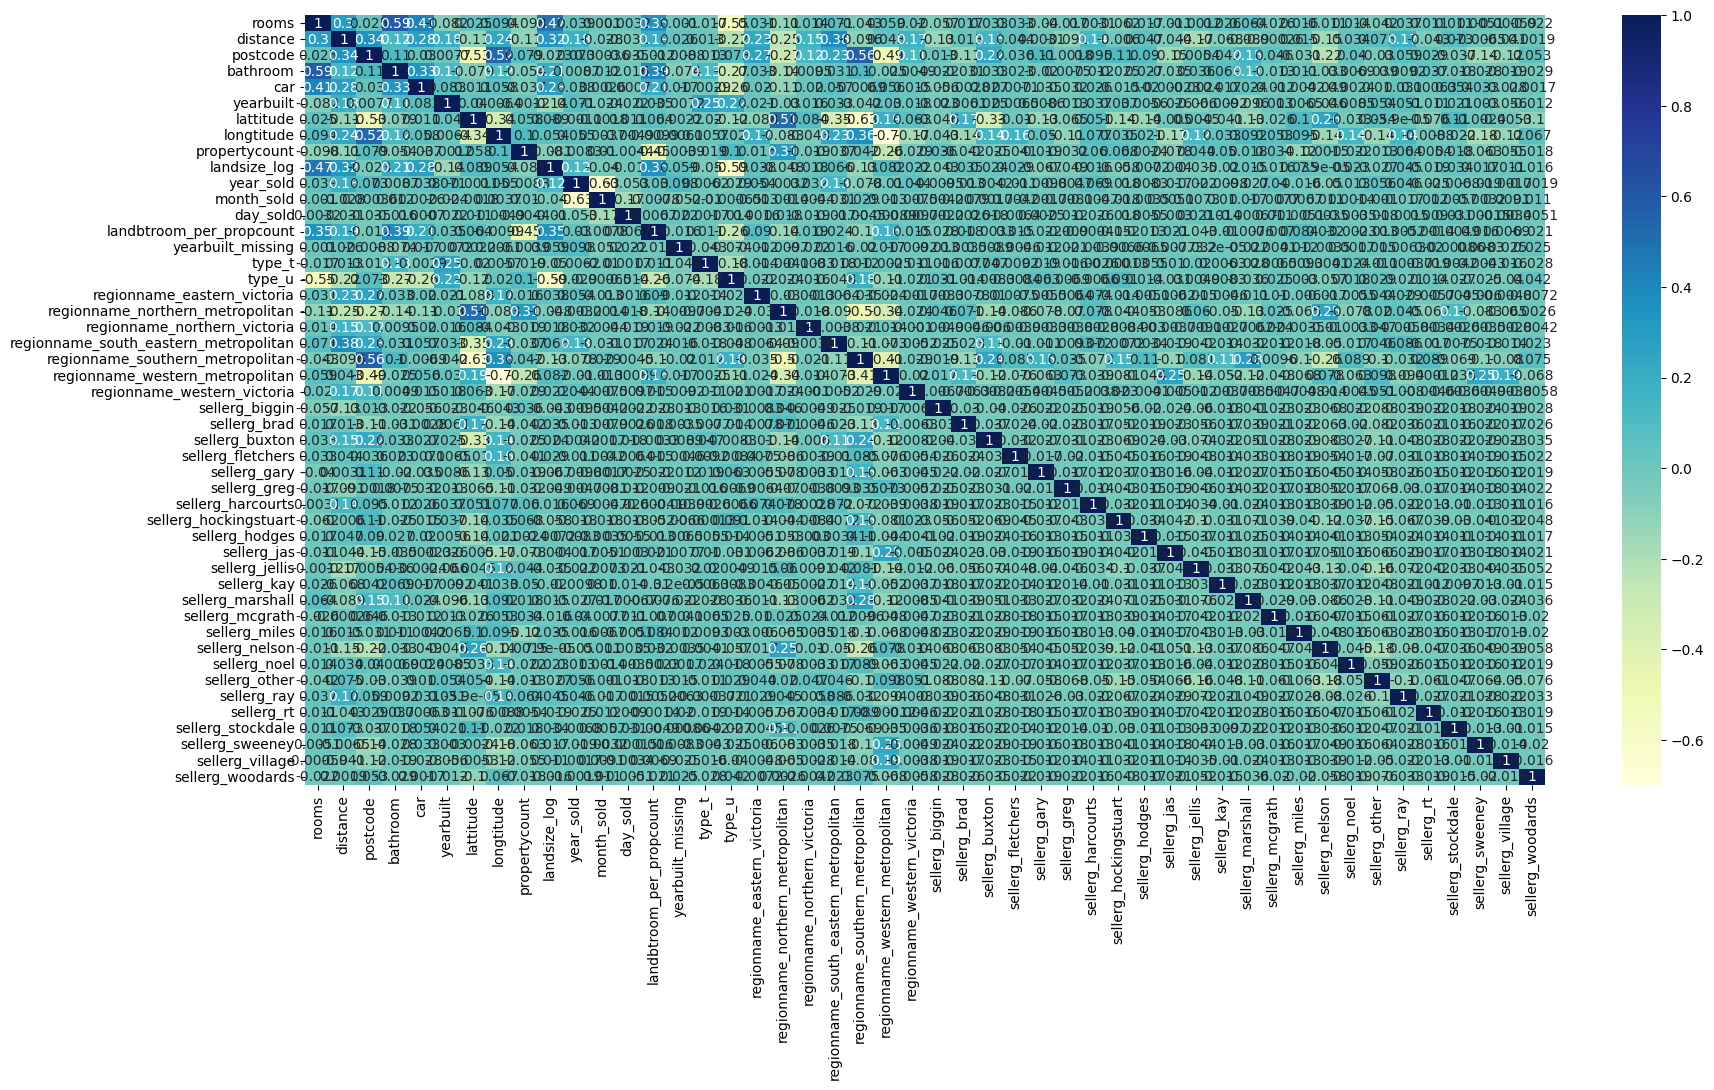

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(OH_X_train.corr(), annot=True, cmap='YlGnBu')

COrrelation of non-one-hot encoded features with price

<Axes: >

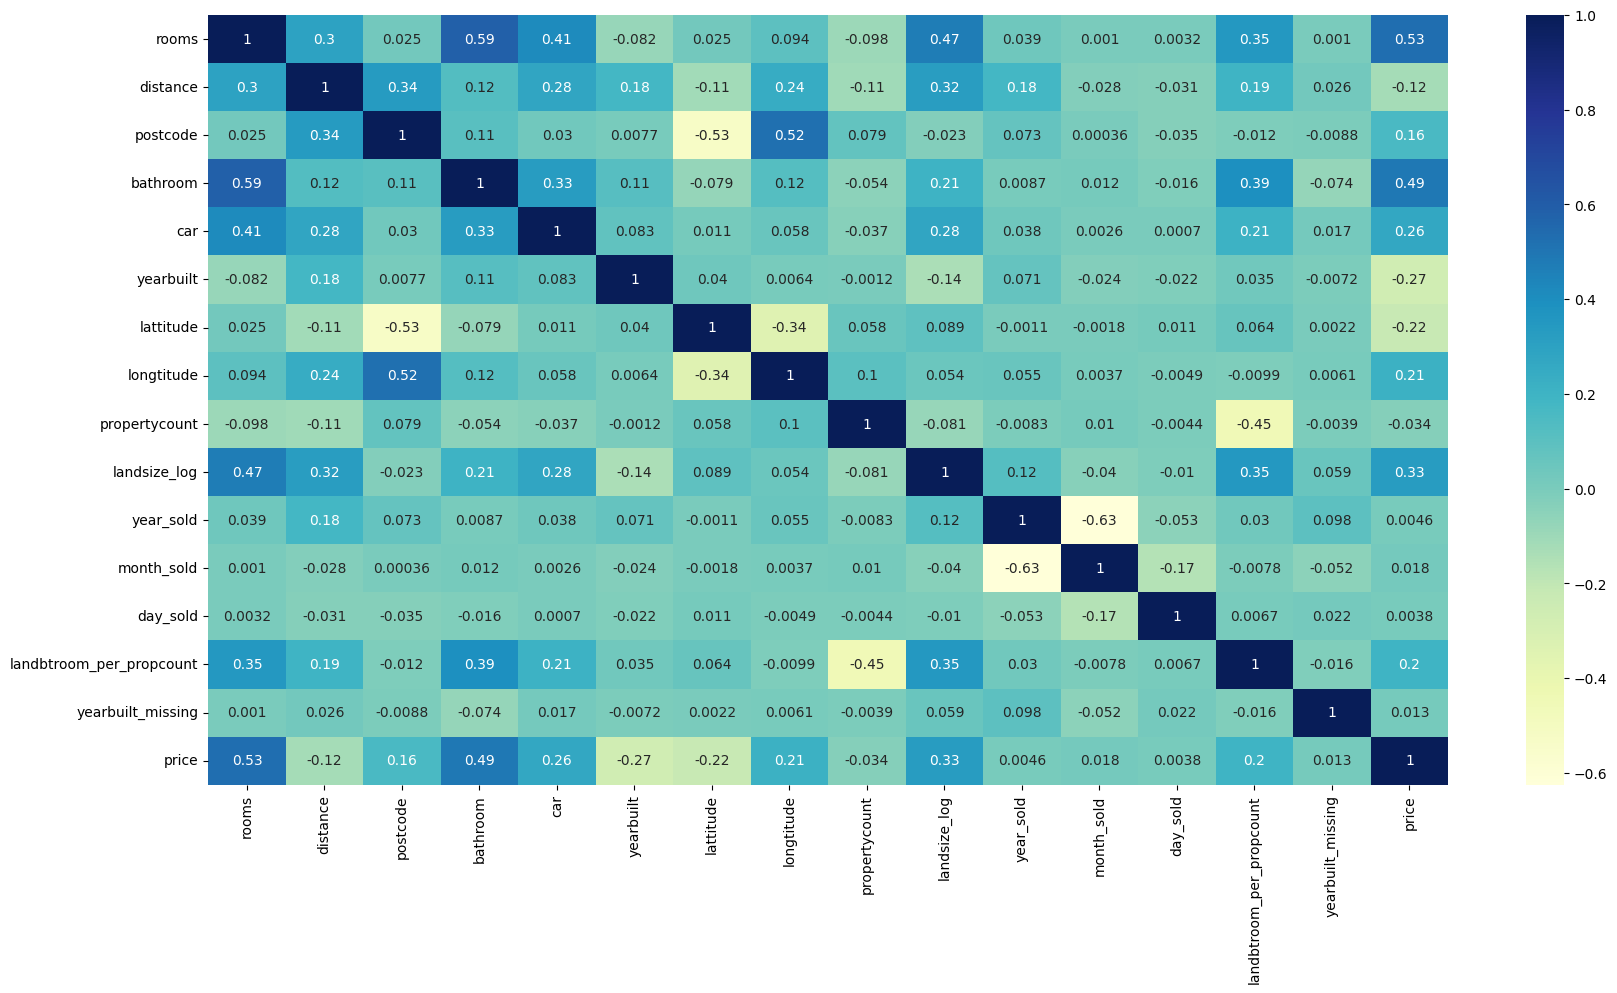

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.concat([OH_X_train.iloc[:, :15], y_train], axis = 1).corr(),
             annot=True, cmap='YlGnBu')

Correlation of house type and region with sellers

<Axes: >

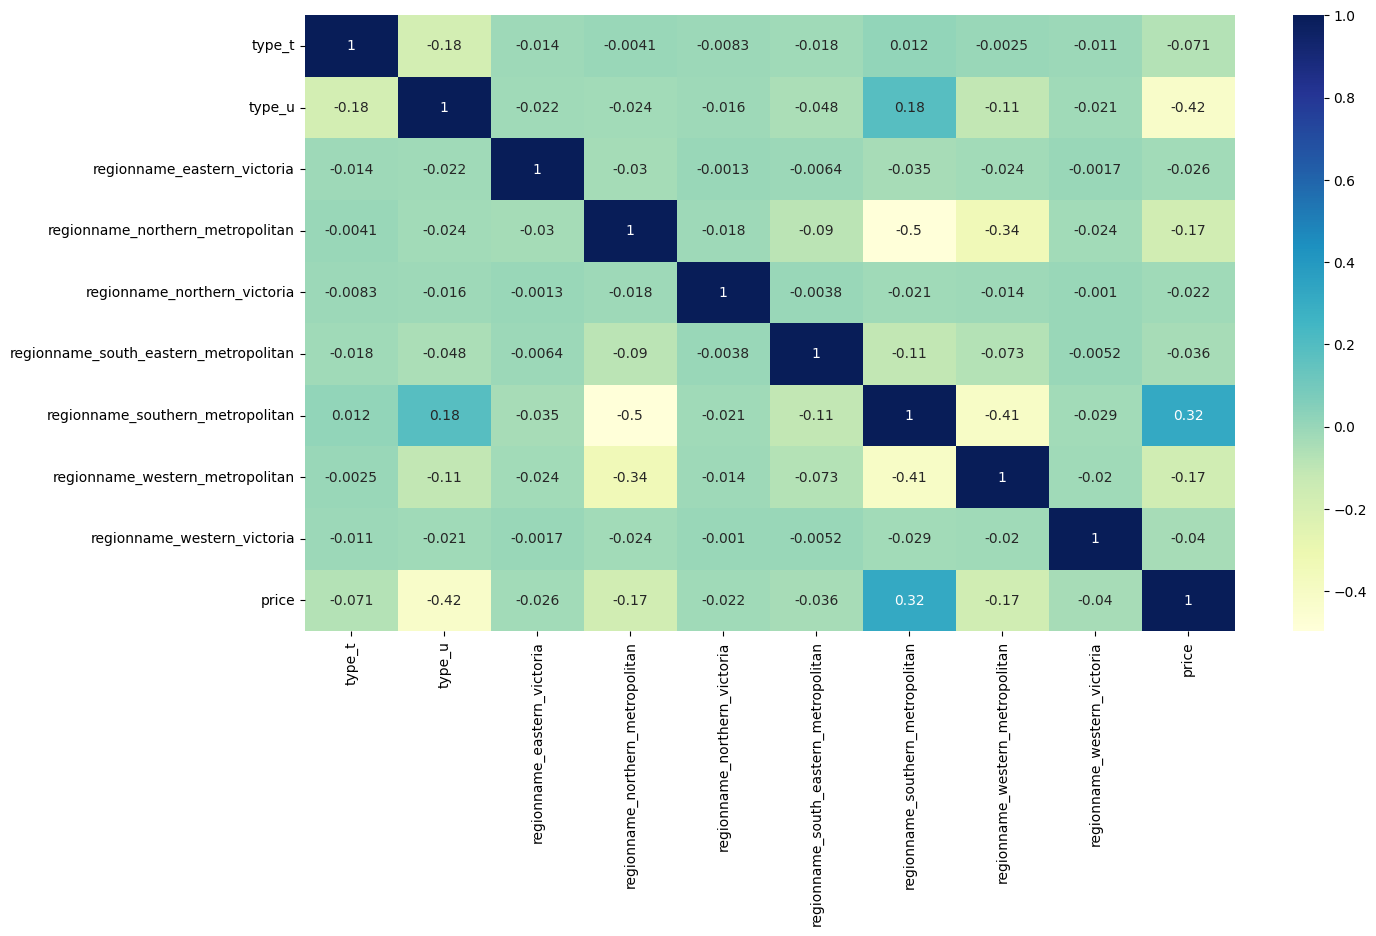

In [43]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.concat([OH_X_train.iloc[:, 15:24], y_train], axis = 1).corr(),
             annot=True, cmap='YlGnBu')

Correlation for sellers with price

<Axes: >

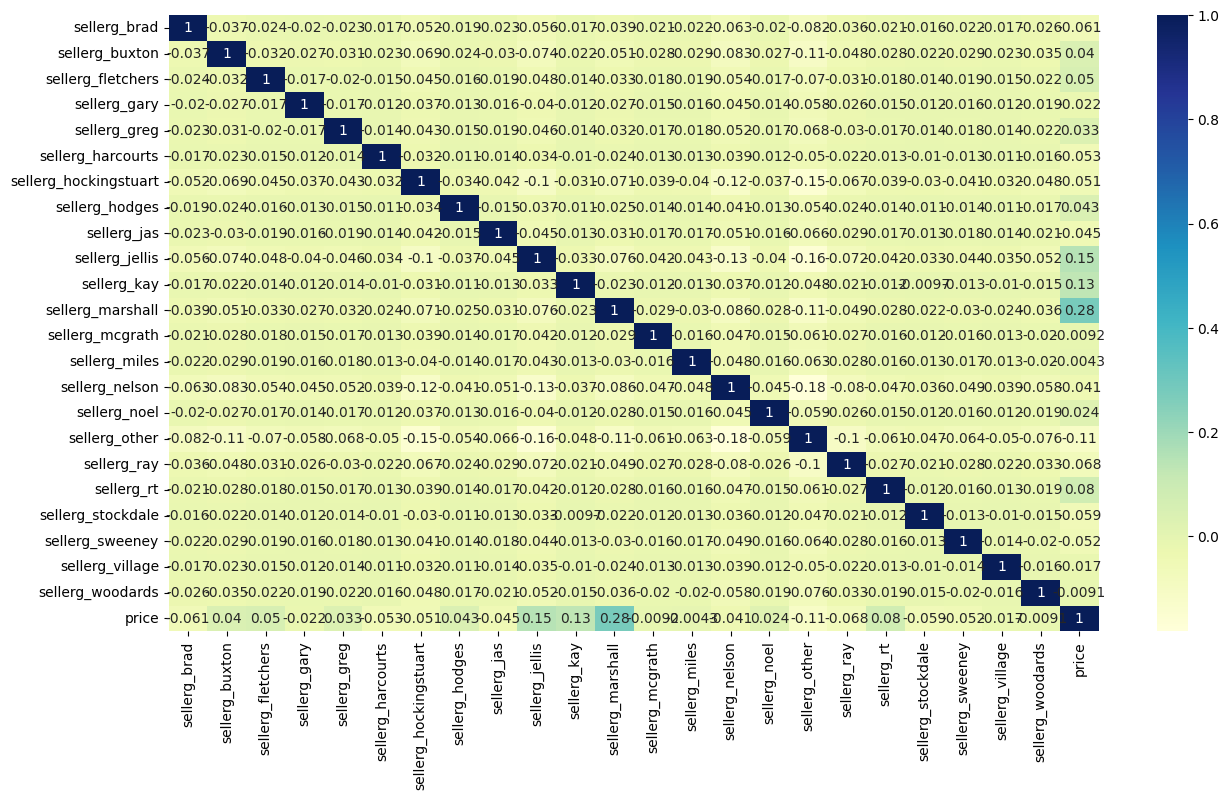

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.concat([OH_X_train.iloc[:, 25:], y_train], axis = 1).corr(),
             annot=True, cmap='YlGnBu')

Removing Sellers

In [45]:
# Removing sellers
X_train_remseller = OH_X_train.drop(OH_X_train.columns[24:], axis = 1)
X_test_remseller = OH_X_test.drop(OH_X_test.columns[24:], axis = 1)

In [46]:
X_train_remseller.head(3)

,rooms,distance,postcode,bathroom,car,yearbuilt,lattitude,longtitude,propertycount,landsize_log,...,yearbuilt_missing,type_t,type_u,regionname_eastern_victoria,regionname_northern_metropolitan,regionname_northern_victoria,regionname_south_eastern_metropolitan,regionname_southern_metropolitan,regionname_western_metropolitan,regionname_western_victoria
0,3,11.2,3127.0,1.0,2.0,1963,-37.8361,145.1006,5457.0,6.196444,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,11.2,3127.0,1.0,2.0,1963,-37.8276,145.1023,5457.0,4.691348,...,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,11.8,3127.0,2.0,2.0,2003,-37.8161,145.1098,2079.0,0.000000,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
cv_score_track['X_train_remseller']=[round(cross_val_score(model_lr, X_train_remseller, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_remseller, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_remseller, y_train, cv=cv).mean(), 2)]
print("CV Score on Train set with Linear Regresion: {}".format(cv_score_track['X_train_remseller'][0]))
print("CV Score on Train set with Decision Tree Regressor: {}".format(cv_score_track['X_train_remseller'][1]))
print("CV Score on Train set with Random Forest Regressor: {}".format(cv_score_track['X_train_remseller'][2]))

CV Score on Train set with Linear Regresion: 0.6
CV Score on Train set with Decision Tree Regressor: 0.52
CV Score on Train set with Random Forest Regressor: 0.76


In [48]:
cv_score_track

{'OH_X_train': [0.64, 0.58, 0.8], 'X_train_remseller': [0.6, 0.52, 0.76]}

The cross validation score reduced with removing sellers

In [49]:
test_score_track['X_train_remseller_mae']=[mae_score_check(X_train_remseller, X_test_remseller, y_train, y_test, model_lr),
                                mae_score_check(X_train_remseller, X_test_remseller, y_train, y_test, model_dt),
                                mae_score_check(X_train_remseller, X_test_remseller, y_train, y_test, model_rf)]
test_score_track['X_train_remseller_r2']=[r2_score_check(X_train_remseller, X_test_remseller, y_train, y_test, model_lr),
                                r2_score_check(X_train_remseller, X_test_remseller, y_train, y_test, model_dt),
                                r2_score_check(X_train_remseller, X_test_remseller, y_train, y_test, model_rf)]


print("Linear Regression : MAE_score= {} , R2_score= {}".format(
    test_score_track['X_train_remseller_mae'][0], 
    test_score_track['X_train_remseller_r2'][0]))

print("Decision Tree Regressor : MAE_score= {} , R2_score= {}".format(
    test_score_track['X_train_remseller_mae'][1], 
    test_score_track['X_train_remseller_r2'][1]))

print("Random Forest Regressor : MAE_score= {} , R2_score= {}".format(
    test_score_track['X_train_remseller_mae'][2], 
    test_score_track['X_train_remseller_r2'][2]))

Linear Regression : MAE_score= 285103.89 , R2_score= 0.53802
Decision Tree Regressor : MAE_score= 245691.95 , R2_score= 0.46037
Random Forest Regressor : MAE_score= 162723.92 , R2_score= 0.75758


Test score reduced as well so it would be better to retain the Seller feature.

Removing Region Names

In [50]:
X_train_remregion= OH_X_train.drop(OH_X_train.columns[17:24], axis = 1)
X_test_remregion= OH_X_test.drop(OH_X_train.columns[17:24], axis = 1)

In [51]:
X_train_remregion.columns

Index(['rooms', 'distance', 'postcode', 'bathroom', 'car', 'yearbuilt',
       'lattitude', 'longtitude', 'propertycount', 'landsize_log', 'year_sold',
       'month_sold', 'day_sold', 'landbtroom_per_propcount',
       'yearbuilt_missing', 'type_t', 'type_u', 'sellerg_biggin',
       'sellerg_brad', 'sellerg_buxton', 'sellerg_fletchers', 'sellerg_gary',
       'sellerg_greg', 'sellerg_harcourts', 'sellerg_hockingstuart',
       'sellerg_hodges', 'sellerg_jas', 'sellerg_jellis', 'sellerg_kay',
       'sellerg_marshall', 'sellerg_mcgrath', 'sellerg_miles',
       'sellerg_nelson', 'sellerg_noel', 'sellerg_other', 'sellerg_ray',
       'sellerg_rt', 'sellerg_stockdale', 'sellerg_sweeney', 'sellerg_village',
       'sellerg_woodards'],
      dtype='object')

In [52]:
cv_score_track['X_train_remregion']=[round(cross_val_score(model_lr, X_train_remregion, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_remregion, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_remregion, y_train, cv=cv).mean(), 2)]
print("CV Score on Train set with Linear Regresion: {}".format(cv_score_track['X_train_remregion'][0]))
print("CV Score on Train set with Decision Tree Regressor: {}".format(cv_score_track['X_train_remregion'][1]))
print("CV Score on Train set with Random Forest Regressor: {}".format(cv_score_track['X_train_remregion'][2]))

CV Score on Train set with Linear Regresion: 0.61
CV Score on Train set with Decision Tree Regressor: 0.5
CV Score on Train set with Random Forest Regressor: 0.77


In [53]:
test_score_track['X_train_remregion_mae']=[mae_score_check(X_train_remregion, X_test_remregion, y_train, y_test, model_lr),
                                mae_score_check(X_train_remregion, X_test_remregion, y_train, y_test, model_dt),
                                mae_score_check(X_train_remregion, X_test_remregion, y_train, y_test, model_rf)]
test_score_track['X_train_remregion_r2']=[r2_score_check(X_train_remregion, X_test_remregion, y_train, y_test, model_lr),
                                r2_score_check(X_train_remregion, X_test_remregion, y_train, y_test, model_dt),
                                r2_score_check(X_train_remregion, X_test_remregion, y_train, y_test, model_rf)]


print("Linear Regression : MAE_score= {} , R2_score= {}".format(
    test_score_track['X_train_remregion_mae'][0], 
    test_score_track['X_train_remregion_r2'][0]))

print("Decision Tree Regressor : MAE_score= {} , R2_score= {}".format(
    test_score_track['X_train_remregion_mae'][1], 
    test_score_track['X_train_remregion_r2'][1]))

print("Random Forest Regressor : MAE_score= {} , R2_score= {}".format(
    test_score_track['X_train_remregion_mae'][2], 
    test_score_track['X_train_remregion_r2'][2]))

Linear Regression : MAE_score= 291739.44 , R2_score= 0.49906
Decision Tree Regressor : MAE_score= 235131.94 , R2_score= 0.55888
Random Forest Regressor : MAE_score= 158832.21 , R2_score= 0.76412


In [54]:
cv_score_track

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77]}

This still reduces the score but not as much as removing sellers does.

Removing information on type of house

In [55]:
X_train_remtype= OH_X_train.drop(OH_X_train.columns[15:17], axis = 1)
X_test_remtype= OH_X_test.drop(OH_X_train.columns[15:17], axis = 1)
cv_score_track['X_train_remtype']=[round(cross_val_score(model_lr, X_train_remtype, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_remtype, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_remtype, y_train, cv=cv).mean(), 2)]
cv_score_track

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76]}

In [56]:
test_score_track['X_train_remtype_mae']=[mae_score_check(X_train_remtype, X_test_remtype, y_train, y_test, model_lr),
                                mae_score_check(X_train_remtype, X_test_remtype, y_train, y_test, model_dt),
                                mae_score_check(X_train_remtype, X_test_remtype, y_train, y_test, model_rf)]
test_score_track['X_train_remtype_r2']=[r2_score_check(X_train_remtype, X_test_remtype, y_train, y_test, model_lr),
                                r2_score_check(X_train_remtype, X_test_remtype, y_train, y_test, model_dt),
                                r2_score_check(X_train_remtype, X_test_remtype, y_train, y_test, model_rf)]


print("Linear Regression : MAE_score= {} , R2_score= {}".format(
    test_score_track['X_train_remtype_mae'][0], 
    test_score_track['X_train_remtype_r2'][0]))

print("Decision Tree Regressor : MAE_score= {} , R2_score= {}".format(
    test_score_track['X_train_remtype_mae'][1], 
    test_score_track['X_train_remtype_r2'][1]))

print("Random Forest Regressor : MAE_score= {} , R2_score= {}".format(
    test_score_track['X_train_remtype_mae'][2], 
    test_score_track['X_train_remtype_r2'][2]))

Linear Regression : MAE_score= 282626.36 , R2_score= 0.52572
Decision Tree Regressor : MAE_score= 243904.01 , R2_score= 0.52796
Random Forest Regressor : MAE_score= 165474.55 , R2_score= 0.7513


In [57]:
display("CV Score:", cv_score_track)

'CV Score:'

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76]}

In [58]:
display("Test Score:", test_score_track)

'Test Score:'

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314],
 'X_train_remseller_mae': [285103.89, 245691.95, 162723.92],
 'X_train_remseller_r2': [0.53802, 0.46037, 0.75758],
 'X_train_remregion_mae': [291739.44, 235131.94, 158832.21],
 'X_train_remregion_r2': [0.49906, 0.55888, 0.76412],
 'X_train_remtype_mae': [282626.36, 243904.01, 165474.55],
 'X_train_remtype_r2': [0.52572, 0.52796, 0.7513]}

Removing House tye reduced the score as well. But we can see that removing region name actually improvd the score slightly for Rando Forest Model

Removing Distance

In [59]:
# Remove Distance feature, as it has low correlation with price
X_train_remdist= OH_X_train.drop('distance', axis = 1)
X_test_remdist= OH_X_test.drop('distance', axis = 1)
cv_score_track['X_train_remdist']=[round(cross_val_score(model_lr, X_train_remdist, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_remdist, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_remdist, y_train, cv=cv).mean(), 2)]
test_score_track['X_train_remdist_mae']=[mae_score_check(X_train_remdist, X_test_remdist, y_train, y_test, model_lr),
                                mae_score_check(X_train_remdist, X_test_remdist, y_train, y_test, model_dt),
                                mae_score_check(X_train_remdist, X_test_remdist, y_train, y_test, model_rf)]
test_score_track['X_train_remdist_r2']=[r2_score_check(X_train_remdist, X_test_remdist, y_train, y_test, model_lr),
                                r2_score_check(X_train_remdist, X_test_remdist, y_train, y_test, model_dt),
                                r2_score_check(X_train_remdist, X_test_remdist, y_train, y_test, model_rf)]

In [60]:
display("CV Score:", cv_score_track)
display("Test Score:", test_score_track)

'CV Score:'

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76],
 'X_train_remdist': [0.56, 0.54, 0.77]}

'Test Score:'

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314],
 'X_train_remseller_mae': [285103.89, 245691.95, 162723.92],
 'X_train_remseller_r2': [0.53802, 0.46037, 0.75758],
 'X_train_remregion_mae': [291739.44, 235131.94, 158832.21],
 'X_train_remregion_r2': [0.49906, 0.55888, 0.76412],
 'X_train_remtype_mae': [282626.36, 243904.01, 165474.55],
 'X_train_remtype_r2': [0.52572, 0.52796, 0.7513],
 'X_train_remdist_mae': [306074.72, 232030.8, 159789.27],
 'X_train_remdist_r2': [0.46608, 0.58503, 0.75918]}

Although the decrease in CV score is less, we see that it affects the test score more. So we cn retain this feature

Removing Post Code

In [61]:
# Remove postcode feature, as it has low correlation with price
X_train_rempostcode= OH_X_train.drop('postcode', axis = 1)
X_test_rempostcode= OH_X_test.drop('postcode', axis = 1)
cv_score_track['X_train_rempostcode']=[round(cross_val_score(model_lr, X_train_rempostcode, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_rempostcode, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_rempostcode, y_train, cv=cv).mean(), 2)]
test_score_track['X_train_rempostcode_mae']=[mae_score_check(X_train_rempostcode, X_test_rempostcode, y_train, y_test, model_lr),
                                mae_score_check(X_train_rempostcode, X_test_rempostcode, y_train, y_test, model_dt),
                                mae_score_check(X_train_rempostcode, X_test_rempostcode, y_train, y_test, model_rf)]
test_score_track['X_train_rempostcode_r2']=[r2_score_check(X_train_rempostcode, X_test_rempostcode, y_train, y_test, model_lr),
                                r2_score_check(X_train_rempostcode, X_test_rempostcode, y_train, y_test, model_dt),
                                r2_score_check(X_train_rempostcode, X_test_rempostcode, y_train, y_test, model_rf)]

In [62]:
display("CV Score:", cv_score_track)
display("Test Score:", test_score_track)

'CV Score:'

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76],
 'X_train_remdist': [0.56, 0.54, 0.77],
 'X_train_rempostcode': [0.63, 0.55, 0.78]}

'Test Score:'

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314],
 'X_train_remseller_mae': [285103.89, 245691.95, 162723.92],
 'X_train_remseller_r2': [0.53802, 0.46037, 0.75758],
 'X_train_remregion_mae': [291739.44, 235131.94, 158832.21],
 'X_train_remregion_r2': [0.49906, 0.55888, 0.76412],
 'X_train_remtype_mae': [282626.36, 243904.01, 165474.55],
 'X_train_remtype_r2': [0.52572, 0.52796, 0.7513],
 'X_train_remdist_mae': [306074.72, 232030.8, 159789.27],
 'X_train_remdist_r2': [0.46608, 0.58503, 0.75918],
 'X_train_rempostcode_mae': [276655.44, 242856.06, 158785.79],
 'X_train_rempostcode_r2': [0.54527, 0.50587, 0.76389]}

Removing postcode improves the Test score as well.

Removing sold_date details

In [63]:
X_train_remymd= OH_X_train.drop(['year_sold', 'month_sold', 'day_sold'], axis = 1)
X_test_remymd= OH_X_test.drop(['year_sold', 'month_sold', 'day_sold'], axis = 1)
cv_score_track['X_train_remymd']=[round(cross_val_score(model_lr, X_train_remymd, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_remymd, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_remymd, y_train, cv=cv).mean(), 2)]
test_score_track['X_train_remymd_mae']=[mae_score_check(X_train_remymd, X_test_remymd, y_train, y_test, model_lr),
                                mae_score_check(X_train_remymd, X_test_remymd, y_train, y_test, model_dt),
                                mae_score_check(X_train_remymd, X_test_remymd, y_train, y_test, model_rf)]
test_score_track['X_train_remymd_r2']=[r2_score_check(X_train_remymd, X_test_remymd, y_train, y_test, model_lr),
                                r2_score_check(X_train_remymd, X_test_remymd, y_train, y_test, model_dt),
                                r2_score_check(X_train_remymd, X_test_remymd, y_train, y_test, model_rf)]

In [64]:
display("CV Score:", cv_score_track)
display("Test Score:", test_score_track)

'CV Score:'

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76],
 'X_train_remdist': [0.56, 0.54, 0.77],
 'X_train_rempostcode': [0.63, 0.55, 0.78],
 'X_train_remymd': [0.62, 0.53, 0.78]}

'Test Score:'

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314],
 'X_train_remseller_mae': [285103.89, 245691.95, 162723.92],
 'X_train_remseller_r2': [0.53802, 0.46037, 0.75758],
 'X_train_remregion_mae': [291739.44, 235131.94, 158832.21],
 'X_train_remregion_r2': [0.49906, 0.55888, 0.76412],
 'X_train_remtype_mae': [282626.36, 243904.01, 165474.55],
 'X_train_remtype_r2': [0.52572, 0.52796, 0.7513],
 'X_train_remdist_mae': [306074.72, 232030.8, 159789.27],
 'X_train_remdist_r2': [0.46608, 0.58503, 0.75918],
 'X_train_rempostcode_mae': [276655.44, 242856.06, 158785.79],
 'X_train_rempostcode_r2': [0.54527, 0.50587, 0.76389],
 'X_train_remymd_mae': [268751.49, 240733.91, 156816.15],
 'X_train_remymd_r2': [0.543, 0.49556, 0.76345]}

Removing sold date seems to increase performance as well

Remove Property Count

In [65]:
X_train_remprpcount= OH_X_train.drop('propertycount', axis = 1)
X_test_remprpcount= OH_X_test.drop('propertycount', axis = 1)
cv_score_track['X_train_remprpcount']=[round(cross_val_score(model_lr, X_train_remprpcount, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_remprpcount, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_remprpcount, y_train, cv=cv).mean(), 2)]
test_score_track['X_train_remprpcount_mae']=[mae_score_check(X_train_remprpcount, X_test_remprpcount, y_train, y_test, model_lr),
                                mae_score_check(X_train_remprpcount, X_test_remprpcount, y_train, y_test, model_dt),
                                mae_score_check(X_train_remprpcount, X_test_remprpcount, y_train, y_test, model_rf)]
test_score_track['X_train_remprpcount_r2']=[r2_score_check(X_train_remprpcount, X_test_remprpcount, y_train, y_test, model_lr),
                                r2_score_check(X_train_remprpcount, X_test_remprpcount, y_train, y_test, model_dt),
                                r2_score_check(X_train_remprpcount, X_test_remprpcount, y_train, y_test, model_rf)]

In [66]:
display("CV Score:", cv_score_track)
display("Test Score:", test_score_track)

'CV Score:'

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76],
 'X_train_remdist': [0.56, 0.54, 0.77],
 'X_train_rempostcode': [0.63, 0.55, 0.78],
 'X_train_remymd': [0.62, 0.53, 0.78],
 'X_train_remprpcount': [0.63, 0.53, 0.77]}

'Test Score:'

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314],
 'X_train_remseller_mae': [285103.89, 245691.95, 162723.92],
 'X_train_remseller_r2': [0.53802, 0.46037, 0.75758],
 'X_train_remregion_mae': [291739.44, 235131.94, 158832.21],
 'X_train_remregion_r2': [0.49906, 0.55888, 0.76412],
 'X_train_remtype_mae': [282626.36, 243904.01, 165474.55],
 'X_train_remtype_r2': [0.52572, 0.52796, 0.7513],
 'X_train_remdist_mae': [306074.72, 232030.8, 159789.27],
 'X_train_remdist_r2': [0.46608, 0.58503, 0.75918],
 'X_train_rempostcode_mae': [276655.44, 242856.06, 158785.79],
 'X_train_rempostcode_r2': [0.54527, 0.50587, 0.76389],
 'X_train_remymd_mae': [268751.49, 240733.91, 156816.15],
 'X_train_remymd_r2': [0.543, 0.49556, 0.76345],
 'X_train_remprpcount_mae': [276813.62, 238310.34, 158233.65],
 'X_train_remprpcount_r2': [0.54694, 0.50256, 0.76437]}

Removing Property count reduces overfitting and increases test score performance as well.

We can test the effect of removing multiple features, including region name, based on above information

In [67]:
X_train_rempregionplus= OH_X_train.drop(OH_X_train.columns[17:24], axis = 1)
X_test_rempregionplus= OH_X_test.drop(OH_X_train.columns[17:24], axis = 1)
remove_features=['month_sold', 'day_sold', 'postcode', 'landbtroom_per_propcount']
X_train_rempregionplus= X_train_rempregionplus.drop(remove_features, axis = 1)
X_test_rempregionplus= X_test_rempregionplus.drop(remove_features, axis = 1)
cv_score_track['X_train_rempregionplus']=[round(cross_val_score(model_lr, X_train_rempregionplus, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_rempregionplus, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_rempregionplus, y_train, cv=cv).mean(), 2)]
test_score_track['X_train_rempregionplus_mae']=[mae_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, model_lr),
                                mae_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, model_dt),
                                mae_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, model_rf)]
test_score_track['X_train_rempregionplus_r2']=[r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, model_lr),
                                r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, model_dt),
                                r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, model_rf)]

In [68]:
display("CV Score:", cv_score_track)
display("Test Score:", test_score_track)

'CV Score:'

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76],
 'X_train_remdist': [0.56, 0.54, 0.77],
 'X_train_rempostcode': [0.63, 0.55, 0.78],
 'X_train_remymd': [0.62, 0.53, 0.78],
 'X_train_remprpcount': [0.63, 0.53, 0.77],
 'X_train_rempregionplus': [0.61, 0.51, 0.78]}

'Test Score:'

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314],
 'X_train_remseller_mae': [285103.89, 245691.95, 162723.92],
 'X_train_remseller_r2': [0.53802, 0.46037, 0.75758],
 'X_train_remregion_mae': [291739.44, 235131.94, 158832.21],
 'X_train_remregion_r2': [0.49906, 0.55888, 0.76412],
 'X_train_remtype_mae': [282626.36, 243904.01, 165474.55],
 'X_train_remtype_r2': [0.52572, 0.52796, 0.7513],
 'X_train_remdist_mae': [306074.72, 232030.8, 159789.27],
 'X_train_remdist_r2': [0.46608, 0.58503, 0.75918],
 'X_train_rempostcode_mae': [276655.44, 242856.06, 158785.79],
 'X_train_rempostcode_r2': [0.54527, 0.50587, 0.76389],
 'X_train_remymd_mae': [268751.49, 240733.91, 156816.15],
 'X_train_remymd_r2': [0.543, 0.49556, 0.76345],
 'X_train_remprpcount_mae': [276813.62, 238310.34, 158233.65],
 'X_train_remprpcount_r2': [0.54694, 0.50256, 0.76437],
 'X_train_rempregionplus_mae': [294950.44, 227501.3, 155890.45],
 'X_train_rempregionplus_r2': [0.46589,

In [69]:
X_train_rempregionplusYBplus= OH_X_train.drop(OH_X_train.columns[17:24], axis = 1)
X_test_rempregionplusYBplus= OH_X_test.drop(OH_X_train.columns[17:24], axis = 1)
remove_features=['month_sold', 'day_sold', 'postcode', 'landbtroom_per_propcount', 'yearbuilt', 'yearbuilt_missing']
X_train_rempregionplusYBplus= X_train_rempregionplusYBplus.drop(remove_features, axis = 1)
X_test_rempregionplusYBplus= X_test_rempregionplusYBplus.drop(remove_features, axis = 1)
cv_score_track['X_train_rempregionplusYBplus']=[round(cross_val_score(model_lr, X_train_rempregionplusYBplus, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_rempregionplusYBplus, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_rempregionplusYBplus, y_train, cv=cv).mean(), 2)]
test_score_track['X_train_rempregionplusYBplus_mae']=[mae_score_check(X_train_rempregionplusYBplus, X_test_rempregionplusYBplus, y_train, y_test, model_lr),
                                mae_score_check(X_train_rempregionplusYBplus, X_test_rempregionplusYBplus, y_train, y_test, model_dt),
                                mae_score_check(X_train_rempregionplusYBplus, X_test_rempregionplusYBplus, y_train, y_test, model_rf)]
test_score_track['X_train_rempregionplusYBplus_r2']=[r2_score_check(X_train_rempregionplusYBplus, X_test_rempregionplusYBplus, y_train, y_test, model_lr),
                                r2_score_check(X_train_rempregionplusYBplus, X_test_rempregionplusYBplus, y_train, y_test, model_dt),
                                r2_score_check(X_train_rempregionplusYBplus, X_test_rempregionplusYBplus, y_train, y_test, model_rf)]

In [70]:
display("CV Score:", cv_score_track)
display("Test Score:", test_score_track)

'CV Score:'

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76],
 'X_train_remdist': [0.56, 0.54, 0.77],
 'X_train_rempostcode': [0.63, 0.55, 0.78],
 'X_train_remymd': [0.62, 0.53, 0.78],
 'X_train_remprpcount': [0.63, 0.53, 0.77],
 'X_train_rempregionplus': [0.61, 0.51, 0.78],
 'X_train_rempregionplusYBplus': [0.6, 0.51, 0.78]}

'Test Score:'

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314],
 'X_train_remseller_mae': [285103.89, 245691.95, 162723.92],
 'X_train_remseller_r2': [0.53802, 0.46037, 0.75758],
 'X_train_remregion_mae': [291739.44, 235131.94, 158832.21],
 'X_train_remregion_r2': [0.49906, 0.55888, 0.76412],
 'X_train_remtype_mae': [282626.36, 243904.01, 165474.55],
 'X_train_remtype_r2': [0.52572, 0.52796, 0.7513],
 'X_train_remdist_mae': [306074.72, 232030.8, 159789.27],
 'X_train_remdist_r2': [0.46608, 0.58503, 0.75918],
 'X_train_rempostcode_mae': [276655.44, 242856.06, 158785.79],
 'X_train_rempostcode_r2': [0.54527, 0.50587, 0.76389],
 'X_train_remymd_mae': [268751.49, 240733.91, 156816.15],
 'X_train_remymd_r2': [0.543, 0.49556, 0.76345],
 'X_train_remprpcount_mae': [276813.62, 238310.34, 158233.65],
 'X_train_remprpcount_r2': [0.54694, 0.50256, 0.76437],
 'X_train_rempregionplus_mae': [294950.44, 227501.3, 155890.45],
 'X_train_rempregionplus_r2': [0.46589,

We see that, having "year built" feature is better.
Removing selerg along with region was also attempted but it reduced performance. 

In [71]:
X_train_multrem= OH_X_train.copy()
X_test_MULTREM= OH_X_test.copy()
remove_features=['month_sold', 'day_sold', 'postcode', 'landbtroom_per_propcount']
X_train_multrem= X_train_multrem.drop(remove_features, axis = 1)
X_test_MULTREM= X_test_MULTREM.drop(remove_features, axis = 1)
cv_score_track['X_train_multrem']=[round(cross_val_score(model_lr, X_train_multrem, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_multrem, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_multrem, y_train, cv=cv).mean(), 2)]
test_score_track['X_train_multrem_mae']=[mae_score_check(X_train_multrem, X_test_MULTREM, y_train, y_test, model_lr),
                                mae_score_check(X_train_multrem, X_test_MULTREM, y_train, y_test, model_dt),
                                mae_score_check(X_train_multrem, X_test_MULTREM, y_train, y_test, model_rf)]
test_score_track['X_train_multrem_r2']=[r2_score_check(X_train_multrem, X_test_MULTREM, y_train, y_test, model_lr),
                                r2_score_check(X_train_multrem, X_test_MULTREM, y_train, y_test, model_dt),
                                r2_score_check(X_train_multrem, X_test_MULTREM, y_train, y_test, model_rf)]

In [72]:
display("CV Score:", cv_score_track)
display("Test Score:", test_score_track)

'CV Score:'

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76],
 'X_train_remdist': [0.56, 0.54, 0.77],
 'X_train_rempostcode': [0.63, 0.55, 0.78],
 'X_train_remymd': [0.62, 0.53, 0.78],
 'X_train_remprpcount': [0.63, 0.53, 0.77],
 'X_train_rempregionplus': [0.61, 0.51, 0.78],
 'X_train_rempregionplusYBplus': [0.6, 0.51, 0.78],
 'X_train_multrem': [0.62, 0.56, 0.78]}

'Test Score:'

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314],
 'X_train_remseller_mae': [285103.89, 245691.95, 162723.92],
 'X_train_remseller_r2': [0.53802, 0.46037, 0.75758],
 'X_train_remregion_mae': [291739.44, 235131.94, 158832.21],
 'X_train_remregion_r2': [0.49906, 0.55888, 0.76412],
 'X_train_remtype_mae': [282626.36, 243904.01, 165474.55],
 'X_train_remtype_r2': [0.52572, 0.52796, 0.7513],
 'X_train_remdist_mae': [306074.72, 232030.8, 159789.27],
 'X_train_remdist_r2': [0.46608, 0.58503, 0.75918],
 'X_train_rempostcode_mae': [276655.44, 242856.06, 158785.79],
 'X_train_rempostcode_r2': [0.54527, 0.50587, 0.76389],
 'X_train_remymd_mae': [268751.49, 240733.91, 156816.15],
 'X_train_remymd_r2': [0.543, 0.49556, 0.76345],
 'X_train_remprpcount_mae': [276813.62, 238310.34, 158233.65],
 'X_train_remprpcount_r2': [0.54694, 0.50256, 0.76437],
 'X_train_rempregionplus_mae': [294950.44, 227501.3, 155890.45],
 'X_train_rempregionplus_r2': [0.46589,

We can also try adding a 'day-from-oldest-date' column instead of datetime.

In [73]:
start_sold_date = sold_date.min()- pd.Timedelta(days=1)
OH_X_train2=OH_X_train.copy()
OH_X_train2['sold_date_count']=(sold_date-start_sold_date).dt.days
OH_X_train2['sold_date_count'].head()

0    1
1    1
2    8
3    8
4    8
Name: sold_date_count, dtype: int64

In [74]:
OH_X_train2['sold_date_count'].corr(y_train)

0.016699959529943065

In [75]:
start_sold_date_test = sold_date_test.min()- pd.Timedelta(days=1)
OH_X_test2=OH_X_test.copy()
OH_X_test2['sold_date_count']=(sold_date_test-start_sold_date_test).dt.days
OH_X_test2['sold_date_count'].describe()

count    2716.000000
mean       41.351988
std        23.043585
min         1.000000
25%        22.000000
50%        43.000000
75%        64.000000
max        78.000000
Name: sold_date_count, dtype: float64

In [76]:
X_train_addselldatecount= OH_X_train2.drop(OH_X_train2.columns[17:24], axis = 1)
X_test_addselldatecount= OH_X_test2.drop(OH_X_train2.columns[17:24], axis = 1)
remove_features=['year_sold', 'month_sold', 'day_sold', 'postcode', 'landbtroom_per_propcount', 'yearbuilt', 'yearbuilt_missing']
X_train_addselldatecount= X_train_addselldatecount.drop(remove_features, axis = 1)
X_test_addselldatecount= X_test_addselldatecount.drop(remove_features, axis = 1)
cv_score_track['X_train_addselldatecount']=[round(cross_val_score(model_lr, X_train_addselldatecount, y_train, cv=cv).mean(), 2), 
                           round(cross_val_score(model_dt, X_train_addselldatecount, y_train, cv=cv).mean(), 2),
                           round(cross_val_score(model_rf, X_train_addselldatecount, y_train, cv=cv).mean(), 2)]
test_score_track['X_train_addselldatecount_mae']=[mae_score_check(X_train_addselldatecount, X_test_addselldatecount, y_train, y_test, model_lr),
                                mae_score_check(X_train_addselldatecount, X_test_addselldatecount, y_train, y_test, model_dt),
                                mae_score_check(X_train_addselldatecount, X_test_addselldatecount, y_train, y_test, model_rf)]
test_score_track['X_train_addselldatecount_r2']=[r2_score_check(X_train_addselldatecount, X_test_addselldatecount, y_train, y_test, model_lr),
                                r2_score_check(X_train_addselldatecount, X_test_addselldatecount, y_train, y_test, model_dt),
                                r2_score_check(X_train_addselldatecount, X_test_addselldatecount, y_train, y_test, model_rf)]

In [77]:
display("CV Score:", cv_score_track)
display("Test Score:", test_score_track)

'CV Score:'

{'OH_X_train': [0.64, 0.58, 0.8],
 'X_train_remseller': [0.6, 0.52, 0.76],
 'X_train_remregion': [0.61, 0.5, 0.77],
 'X_train_remtype': [0.6, 0.52, 0.76],
 'X_train_remdist': [0.56, 0.54, 0.77],
 'X_train_rempostcode': [0.63, 0.55, 0.78],
 'X_train_remymd': [0.62, 0.53, 0.78],
 'X_train_remprpcount': [0.63, 0.53, 0.77],
 'X_train_rempregionplus': [0.61, 0.51, 0.78],
 'X_train_rempregionplusYBplus': [0.6, 0.51, 0.78],
 'X_train_multrem': [0.62, 0.56, 0.78],
 'X_train_addselldatecount': [0.6, 0.51, 0.77]}

'Test Score:'

{'OH_X_train_mae': [276815.42, 241621.33, 158552.71],
 'OH_X_train_r2': [0.54694, 0.49628, 0.76314],
 'X_train_remseller_mae': [285103.89, 245691.95, 162723.92],
 'X_train_remseller_r2': [0.53802, 0.46037, 0.75758],
 'X_train_remregion_mae': [291739.44, 235131.94, 158832.21],
 'X_train_remregion_r2': [0.49906, 0.55888, 0.76412],
 'X_train_remtype_mae': [282626.36, 243904.01, 165474.55],
 'X_train_remtype_r2': [0.52572, 0.52796, 0.7513],
 'X_train_remdist_mae': [306074.72, 232030.8, 159789.27],
 'X_train_remdist_r2': [0.46608, 0.58503, 0.75918],
 'X_train_rempostcode_mae': [276655.44, 242856.06, 158785.79],
 'X_train_rempostcode_r2': [0.54527, 0.50587, 0.76389],
 'X_train_remymd_mae': [268751.49, 240733.91, 156816.15],
 'X_train_remymd_r2': [0.543, 0.49556, 0.76345],
 'X_train_remprpcount_mae': [276813.62, 238310.34, 158233.65],
 'X_train_remprpcount_r2': [0.54694, 0.50256, 0.76437],
 'X_train_rempregionplus_mae': [294950.44, 227501.3, 155890.45],
 'X_train_rempregionplus_r2': [0.46589,

This reduced the performance

In [78]:
X_test_rempregionplus.columns

Index(['rooms', 'distance', 'bathroom', 'car', 'yearbuilt', 'lattitude',
       'longtitude', 'propertycount', 'landsize_log', 'year_sold',
       'yearbuilt_missing', 'type_t', 'type_u', 'sellerg_biggin',
       'sellerg_brad', 'sellerg_buxton', 'sellerg_fletchers', 'sellerg_gary',
       'sellerg_greg', 'sellerg_harcourts', 'sellerg_hockingstuart',
       'sellerg_hodges', 'sellerg_jas', 'sellerg_jellis', 'sellerg_kay',
       'sellerg_marshall', 'sellerg_mcgrath', 'sellerg_miles',
       'sellerg_nelson', 'sellerg_noel', 'sellerg_other', 'sellerg_ray',
       'sellerg_rt', 'sellerg_stockdale', 'sellerg_sweeney', 'sellerg_village',
       'sellerg_woodards'],
      dtype='object')

#### Selected Features
With this we can set the following to be the final selected features.
<ul>
        <li>rooms </li>
        <li>distance </li>
        <li>bathroom </li>
        <li>car </li>
        <li>yearbuilt and yearbuilt_missing</li>
        <li>lattitude and longtitude </li>
        <li>landsize_log </li>
        <li>year_sold </li>
        <li>type - One hot encoded </li>
        <li>seller - One hot encoded</li>

</ul>

### Hyperparameter Tuning
With the selected features we can tr to see if we can improve the performance by tuning the Random Forest Regressor model. We use Grid Search to see the best parameters in cross validation and use it to evaluate the Test set.

In [79]:
param_grid_rf = {
    "n_estimators": [10, 50, 100, 150, 200],
    "max_features": [3, 9, 15, 21]
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid_rf, cv=5, 
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_test_rempregionplus, y_test)

best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=15, n_estimators=200)

In [80]:
param_grid_rf = {
    "n_estimators": [150, 175, 200, 225, 250, 275],
    "max_features": [10, 15, 21, 24, 27]
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid_rf, cv=5, 
                           scoring="r2",
                           return_train_score=True)
grid_search.fit(X_test_rempregionplus, y_test)
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=21, n_estimators=175)

In [81]:
best_forest=RandomForestRegressor(random_state=1, n_estimators=250, max_features=15)
print("CV score: ", round(cross_val_score(best_forest, X_train_rempregionplus, y_train, cv=cv).mean(), 2))
print("Test score: ", r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, best_forest))

CV score:  0.78
Test score:  0.76419


In [82]:
best_forest=RandomForestRegressor(random_state=1, n_estimators=275, max_features=21)
print("CV score: ", round(cross_val_score(best_forest, X_train_rempregionplus, y_train, cv=cv).mean(), 2))
print("Test score: ", r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, best_forest))

CV score:  0.78
Test score:  0.76933


In [83]:
param_grid_rf = {
    "n_estimators": [200, 250, 275, 300, 400],
    "max_features": [15, 21, 24, 27]
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid_rf, cv=5, 
                           scoring="r2",
                           return_train_score=True)
grid_search.fit(X_test_rempregionplus, y_test)
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=21, n_estimators=250)

In [84]:
best_forest=RandomForestRegressor(random_state=1, n_estimators=275, max_features=15)
print("CV score: ", round(cross_val_score(best_forest, X_train_rempregionplus, y_train, cv=cv).mean(), 2))
print("Test score: ", r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, best_forest))

CV score:  0.78
Test score:  0.76453


In [85]:
best_forest=RandomForestRegressor(random_state=1, n_estimators=300, max_features=21)
print("CV score: ", round(cross_val_score(best_forest, X_train_rempregionplus, y_train, cv=cv).mean(), 2))
print("Test score: ", r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, best_forest))

CV score:  0.78
Test score:  0.7697


In [86]:
param_grid_rf = {
    "n_estimators": [275, 300, 325, 350],
    "max_features": [18, 21, 24], 
    "max_depth" : [5, 10, 20, 30]
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid_rf, cv=5, 
                           scoring="r2",
                           return_train_score=True)
grid_search.fit(X_test_rempregionplus, y_test)
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_depth=20, max_features=18, n_estimators=350)

In [87]:
best_forest=RandomForestRegressor(random_state=1, n_estimators=300, max_features=18, max_depth=20)
print("CV score: ", round(cross_val_score(best_forest, X_train_rempregionplus, y_train, cv=cv).mean(), 2))
print("Test score: ", r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, best_forest))

CV score:  0.78
Test score:  0.76662


In [88]:
param_grid_rf = {
    "n_estimators": [350, 375, 400],
    "max_features": [21] ,
    "max_depth" : [30, 35, 40]
}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid_rf, cv=5, 
                           scoring="r2",
                           return_train_score=True)
grid_search.fit(X_test_rempregionplus, y_test)
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_depth=40, max_features=21, n_estimators=350)

In [89]:
best_forest=RandomForestRegressor(random_state=1, n_estimators=350, max_features=21, max_depth=40)
print("CV score: ", round(cross_val_score(best_forest, X_train_rempregionplus, y_train, cv=cv).mean(), 2))
print("Test score: ", r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, best_forest))

CV score:  0.78
Test score:  0.76981


In [90]:
best_forest=RandomForestRegressor(random_state=1, n_estimators=350, max_features=21)
print("CV score: ", round(cross_val_score(best_forest, X_train_rempregionplus, y_train, cv=cv).mean(), 2))
print("Test score: ", r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, best_forest))

CV score:  0.78
Test score:  0.76981


In [91]:
best_forest=RandomForestRegressor(random_state=1, n_estimators=350, max_features=18)
print("CV score: ", round(cross_val_score(best_forest, X_train_rempregionplus, y_train, cv=cv).mean(), 2))
print("Test score: ", r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, best_forest))

CV score:  0.78
Test score:  0.76778


In [92]:
best_forest=RandomForestRegressor(random_state=1, n_estimators=375, max_features=21)
print("CV score: ", round(cross_val_score(best_forest, X_train_rempregionplus, y_train, cv=cv).mean(), 2))
print("Test score: ", r2_score_check(X_train_rempregionplus, X_test_rempregionplus, y_train, y_test, best_forest))

CV score:  0.78
Test score:  0.76985


#### Selected Hyperparameters
Based on the above, we select the following hyperparameters
<ul>
        <li>n_estimators=375</li>
        <li>max_features=21</li>
</ul>

### With the selected Model, features and hyper parameters we can proceed to buil our House Price Predictor